In [1]:
# Load required packages
library(alakazam)
library(dowser)
library(airr)
library(dplyr)
library(ggtree)

# read the database
db <- read_airr("/home/phil/processed_docker/r_docker/changeo_10x/r_filtered_contig_heavy_germ-pass.tsv")

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 


Attaching package: ‘dowser’


The following objects are masked from ‘package:alakazam’:

    ExampleDb, ExampleTrees



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


ggtree v2.4.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics, 2020, 69:e96

In [2]:
clones <- formatClones(
db,
seq = "sequence_alignment",
clone = "clone_id",
subclone = "subclone_id",
nproc = 16,
chain = "H",
heavy = "IGH",
trait = "c_call",
cell = "cell_id",
locus = "locus",
minseq = 2,
split_light = FALSE,
majoronly = FALSE,
columns = NULL,
)

print(clones)

# A tibble: 10 x 4
   clone_id data       locus  seqs
   <chr>    <list>     <chr> <int>
 1 263_112  <airrClon> IGH       4
 2 396_280  <airrClon> IGH       3
 3 251_31   <airrClon> IGH       2
 4 255_469  <airrClon> IGH       2
 5 273_16   <airrClon> IGH       2
 6 446_243  <airrClon> IGH       2
 7 488_194  <airrClon> IGH       2
 8 695_370  <airrClon> IGH       2
 9 700_138  <airrClon> IGH       2
10 714_564  <airrClon> IGH       2


In [3]:
# Build maxmimum parsimony trees for first four clones using 
# phangorn package in R
trees <- getTrees(clones)

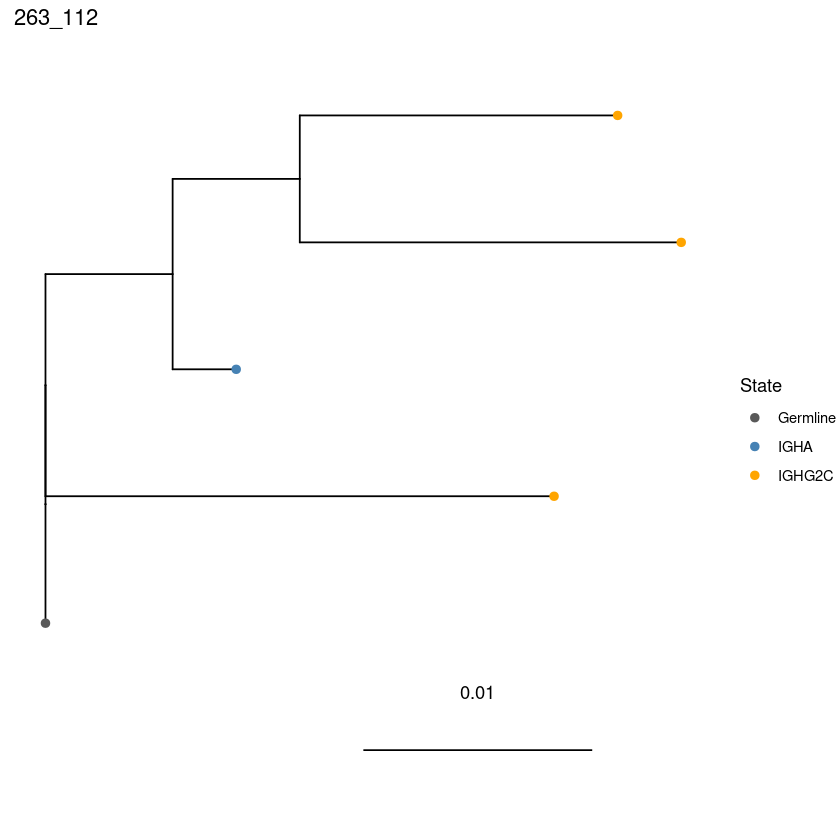

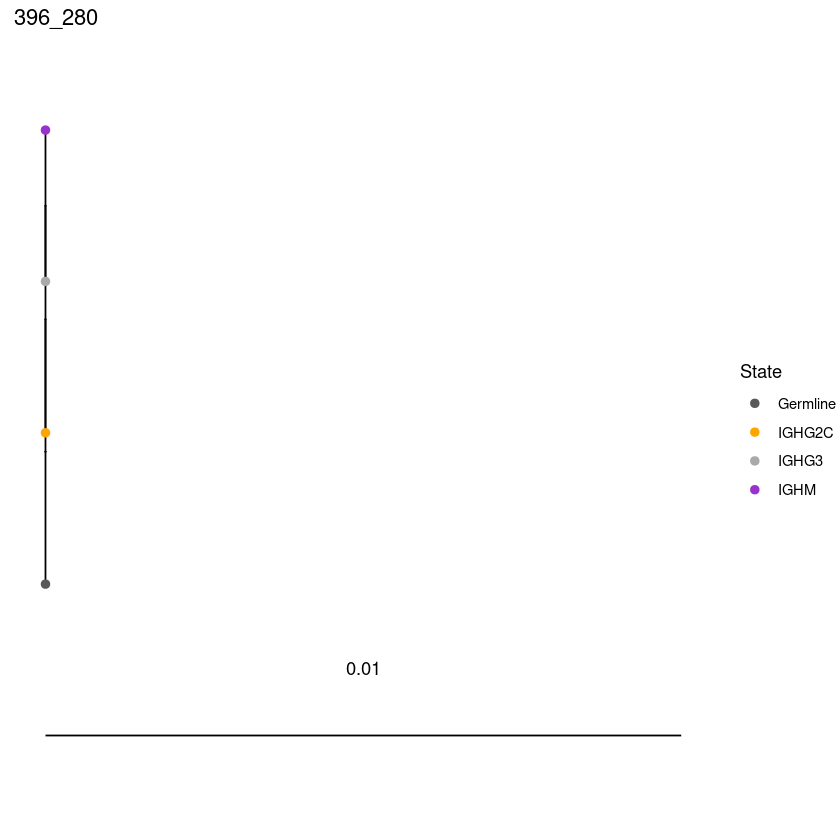

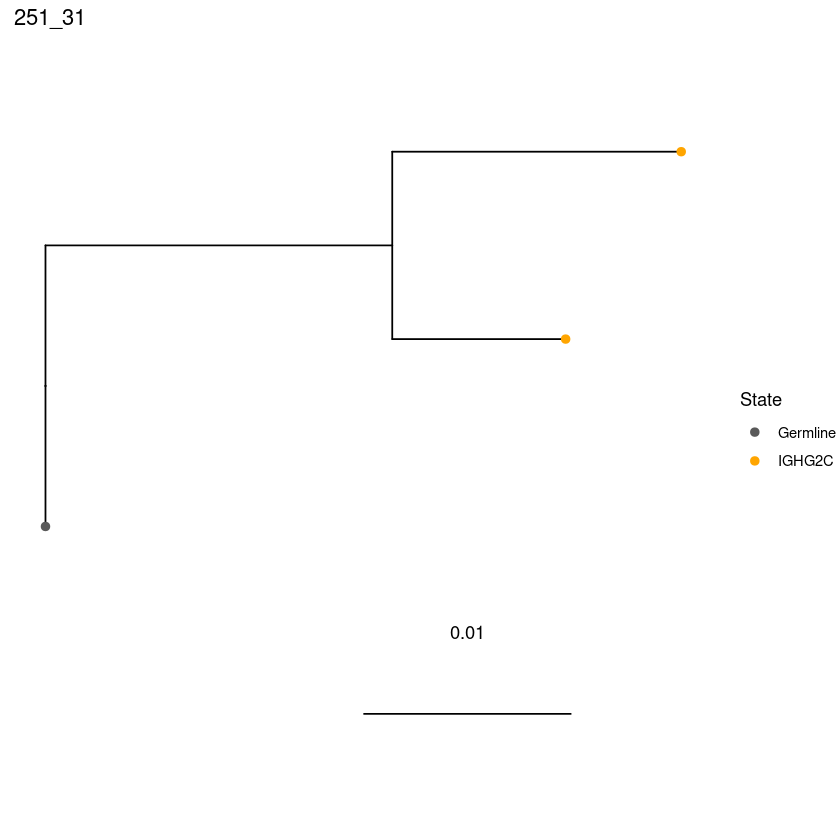

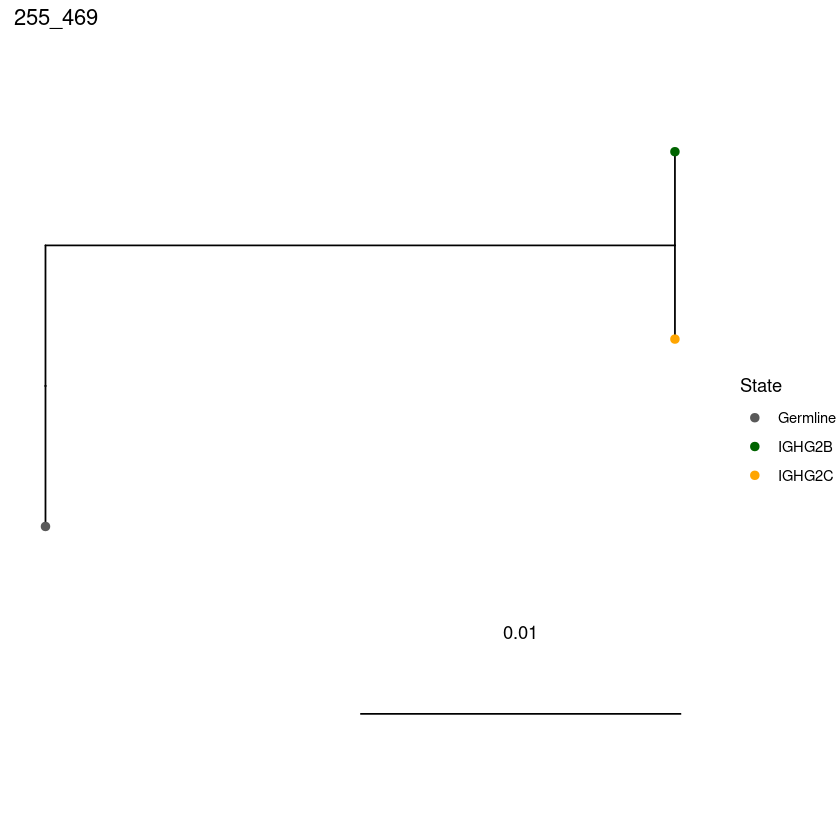

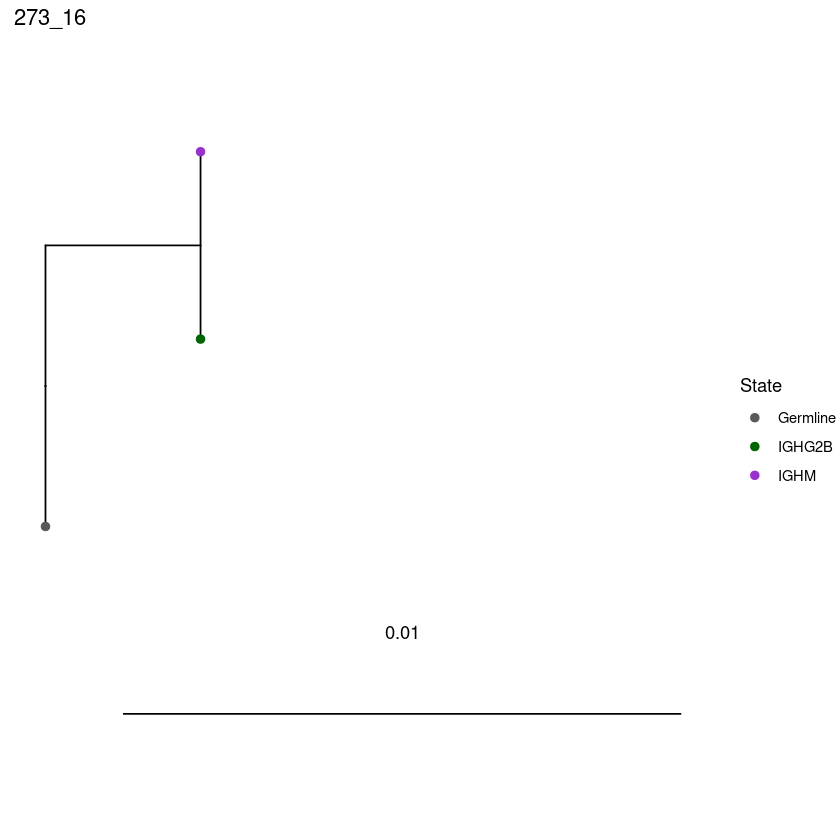

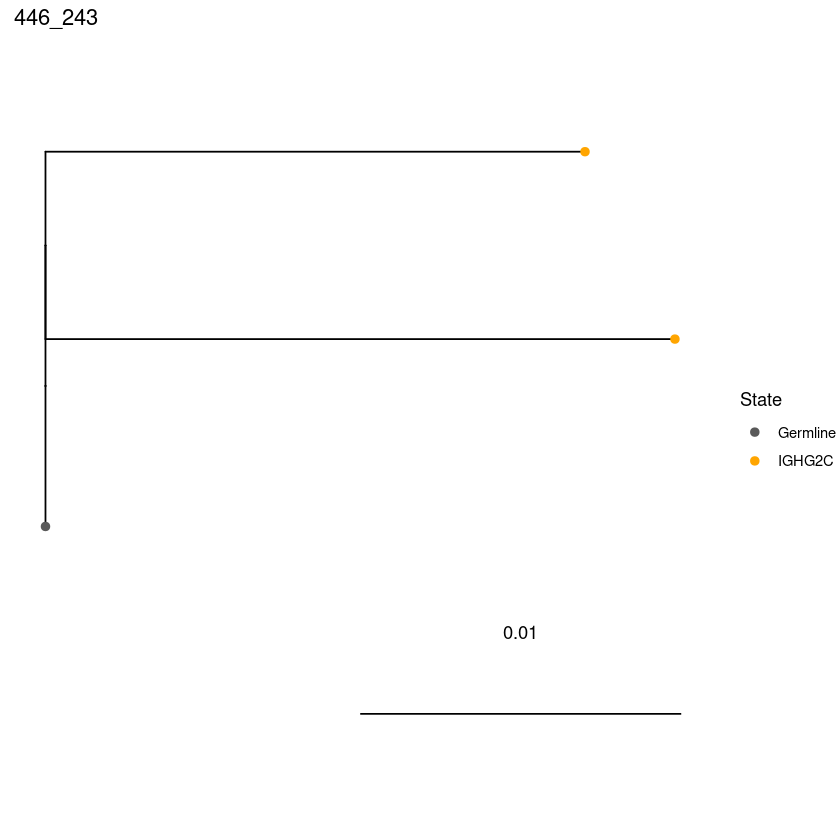

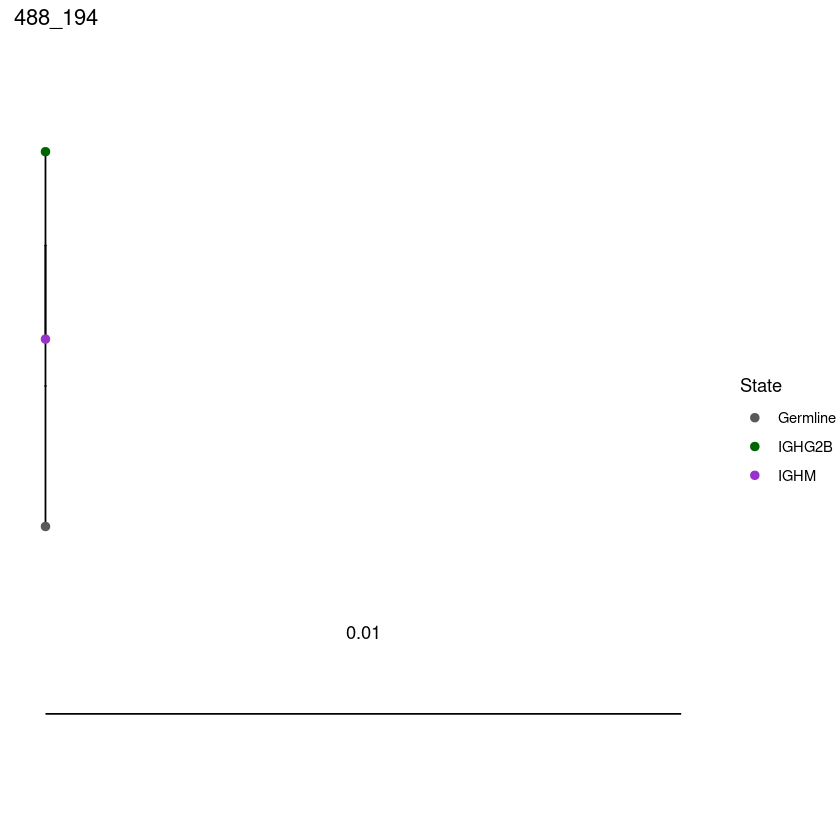

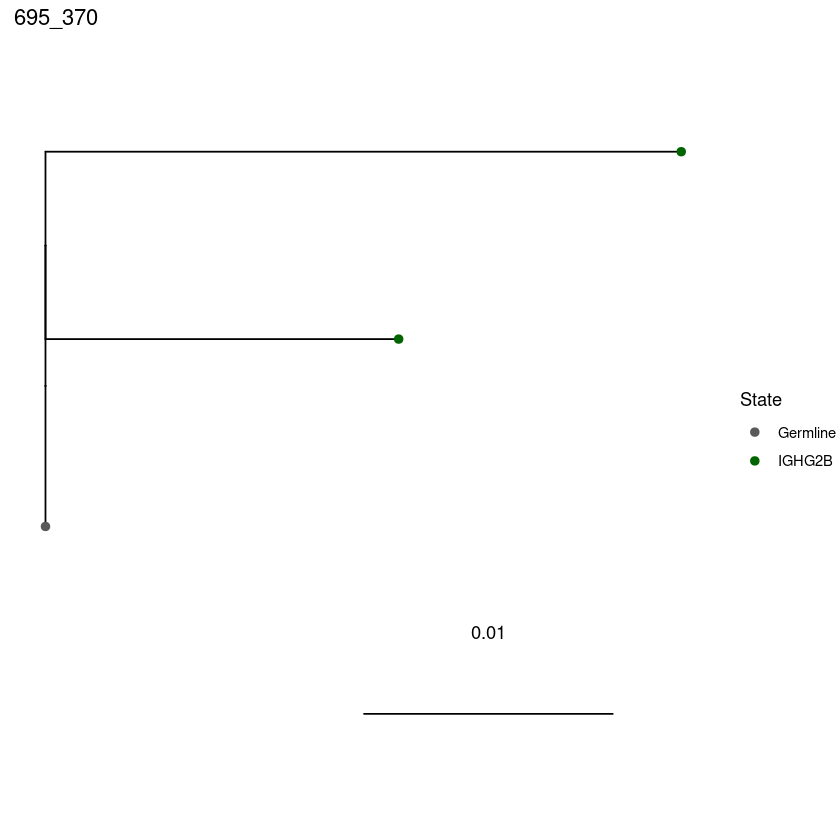

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]


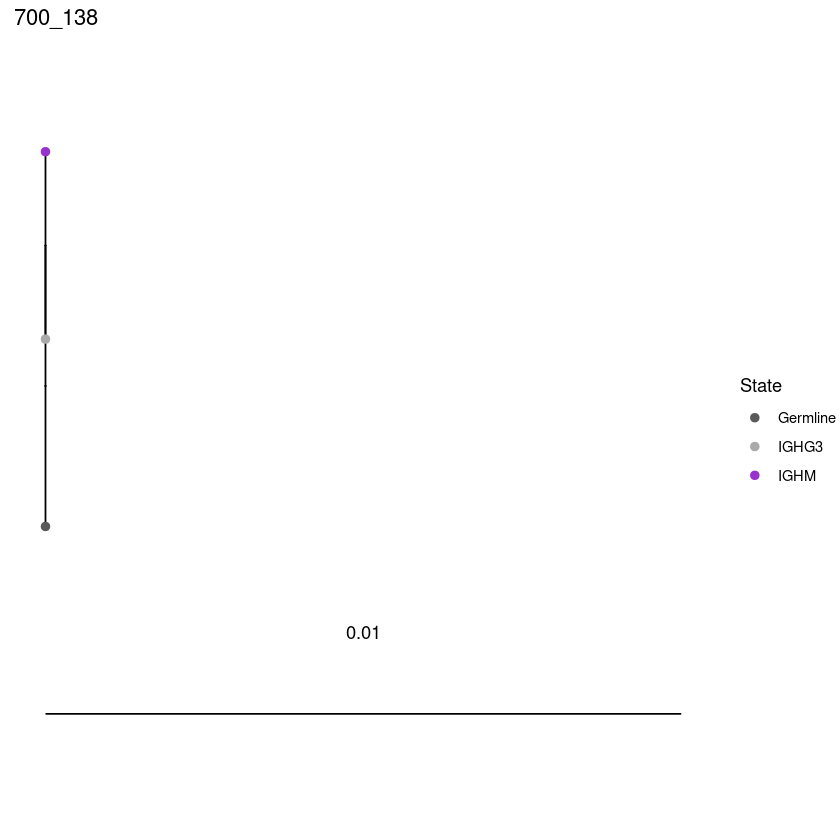

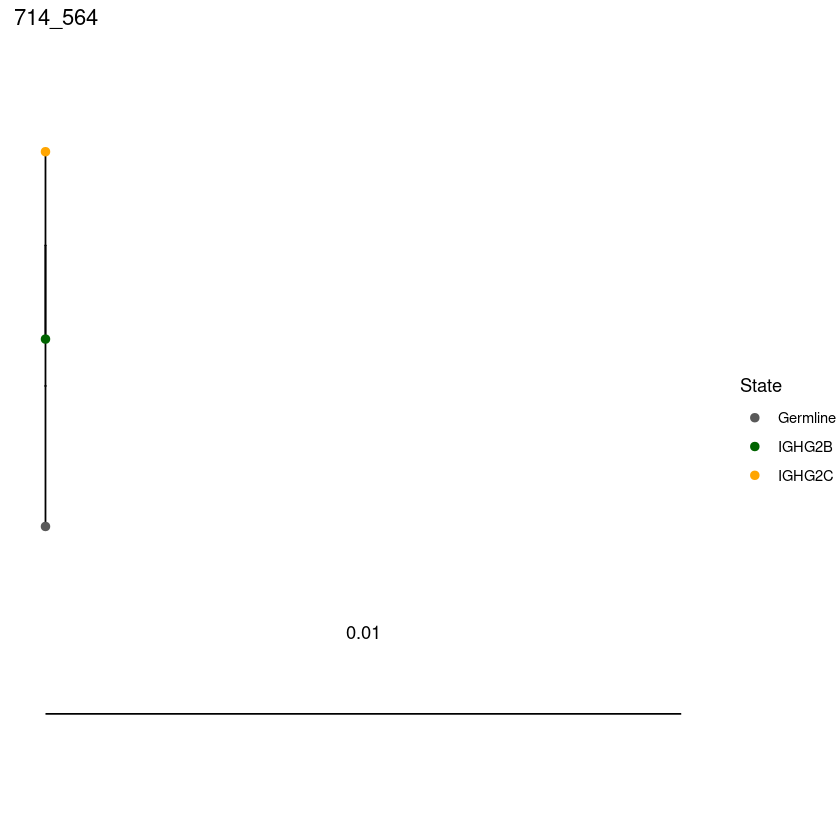

In [13]:
# or, specify a named palette vector
custom_palette=c("IGHA"="#E41A1C", "IGHG2C"="#377EB8", "IGHG3"="#0000FF", "IGHG2B"="#984EA3", "IGHG1"="#00FF00",
                 "IGHD"="#D95F02", "IGHM"="#4DAF4A", "Germline"="grey35")

isotype_colors <- c("IGHM"="darkorchid", "IGHD"="firebrick", "IGHA"="steelblue",
                    "IGHG1"="seagreen", "IGHG2B"="darkgreen", "IGHG2C"="orange",
                   "IGHG3"="darkgrey", "Germline"="grey35")

plots <- plotTrees(trees, tips= "c_call", tipsize=2, tip_palette=isotype_colors)
plots

$title
[1] "B cell tree"

attr(,"class")
[1] "labels"

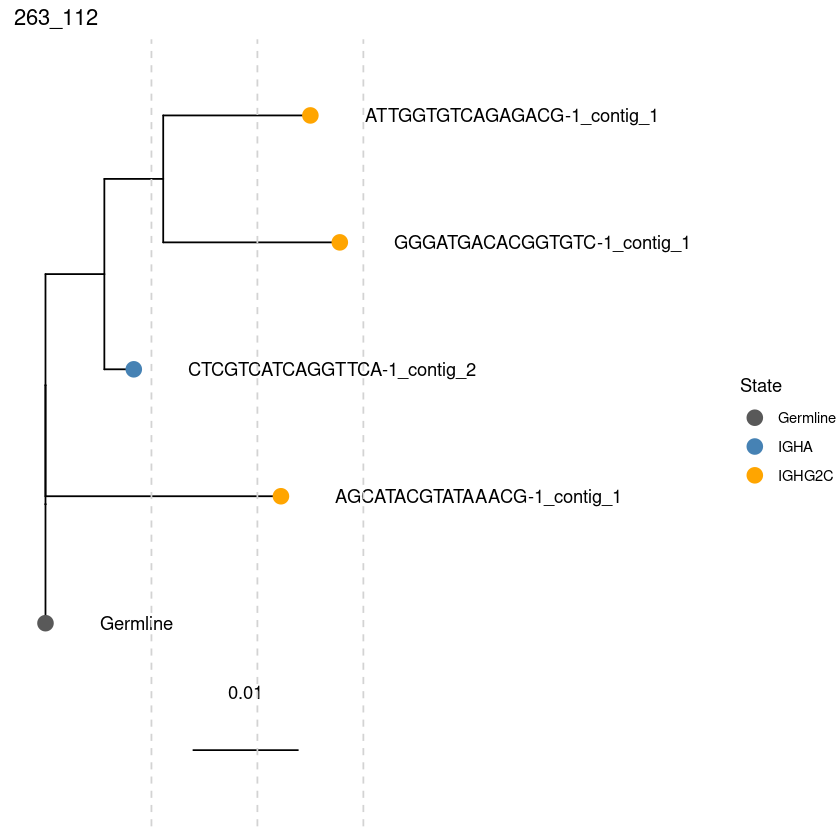

In [17]:
plots <- plotTrees(trees, tips="c_call", tipsize=4, tip_palette=isotype_colors)

treeplot <- plots[[1]] + geom_tiplab(offset=0.005) + 
geom_vline(xintercept=c(0.01, 0.02, 0.03), 
           linetype="dashed",color="lightgrey") + xlim(0,0.06)
ggtitle("B cell tree")

treeplot

In [15]:
# simple tree plotting with ggtree R package with isotypes at tips
scaleBranches(trees, edge_type = "mutations")

clone_id data                                                    locus seqs
1  263_112  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   4   
2  396_280  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   3   
3  251_31   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
4  255_469  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
5  273_16   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
6  446_243  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
7  488_194  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
8  695_370  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
9  700_138  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
10 714_564  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
   trees                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [16]:
clones$trees[[2]]$edge_type

Warning message:
“Unknown or uninitialised column: `trees`.”


NULL